## 타이타닉 데이터 EDA
학습한 내용을 타이타닉 데이터에 적용해봅시다.

**`pd.read_csv`를 이용하여 titanic 데이터를 로드합니다.**

In [418]:
data=pd.read_csv('./titanic_train.csv')

**data의 상위 5개 row를 확인합니다.**

In [419]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**각 컬럼의 Null 갯수를 확인합니다.**

In [420]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [434]:
data.isna().sum()  # 같은거다

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**생존, 사망의 비율 및 카운트를 시각화 합니다.**

In [433]:
data['Survived']  # 생존에 대한 Series

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [431]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: ylabel='Survived'>

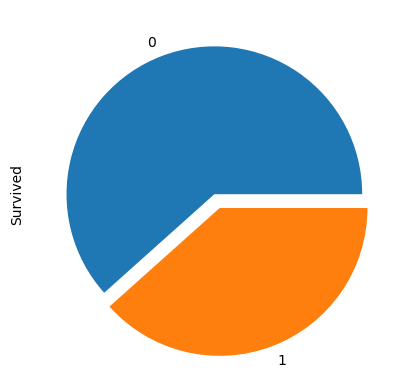

In [432]:
data['Survived'].value_counts().plot.pie(explode=[0, 0.1])

In [435]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Survived', ylabel='count'>

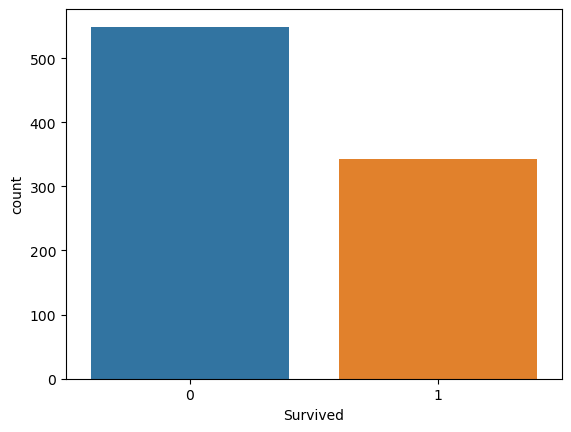

In [439]:
sns.countplot(x='Survived', data=data)

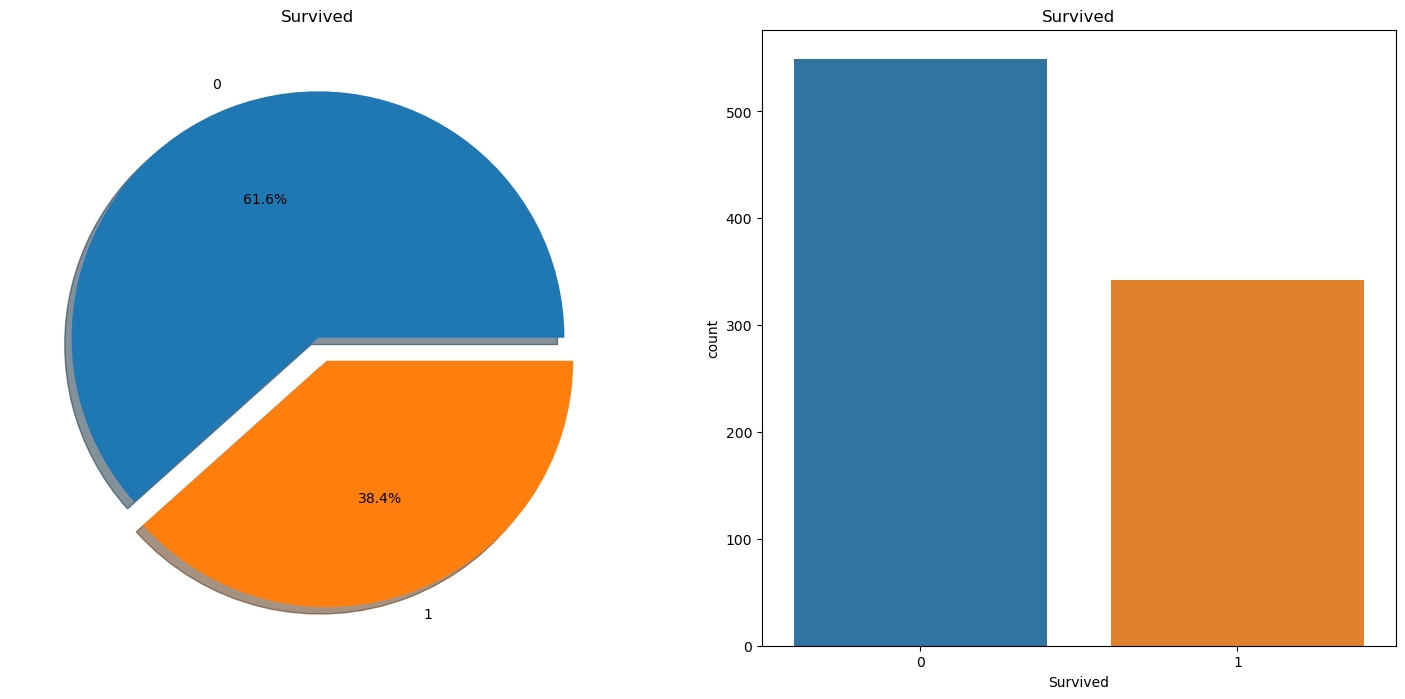

In [440]:
f,ax=plt.subplots(1,2,figsize=(18,8))  # ax[0], ax[1] 두 개 생성하겠다
# f 는 어떤 의미인가? figure라는 전체 도화지와 관련된 변수. ax는 각각의 그림 그리는 좌표와 관련
# 전체 도화지를 저장하고 싶을 때 f.savefig()라 하는데 이런식으로 사용하기 위해서 f를 지정해준다
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**Sex를 categorical feature로 변환**

`groupby`를 이용하여 `Sex`별로 `Survived`의 갯수를 구합니다.

In [442]:
data.groupby(['Sex','Survived']).apply(lambda x: print(x))  # 이런식으로 중간단계를 살펴보면서 진행한다

     PassengerId  Survived  Pclass  \
14            15         0       3   
18            19         0       3   
24            25         0       3   
38            39         0       3   
40            41         0       3   
..           ...       ...     ...   
854          855         0       2   
863          864         0       3   
882          883         0       3   
885          886         0       3   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
24                       Palsson, Miss. Torborg Danira  female   8.0      3   
38                  Vander Planke, Miss. Augusta Maria  female  18.0      2   
40      Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  female  40.0      1   
..                                                 ...     ...   ... 

""


In [441]:
data.groupby(['Sex','Survived'])['Survived'].apply(lambda x: print(x))

14     0
18     0
24     0
38     0
40     0
      ..
854    0
863    0
882    0
885    0
888    0
Name: (female, 0), Length: 81, dtype: int64
1      1
2      1
3      1
8      1
9      1
      ..
874    1
875    1
879    1
880    1
887    1
Name: (female, 1), Length: 233, dtype: int64
0      0
4      0
5      0
6      0
7      0
      ..
881    0
883    0
884    0
886    0
890    0
Name: (male, 0), Length: 468, dtype: int64
17     1
21     1
23     1
36     1
55     1
      ..
838    1
839    1
857    1
869    1
889    1
Name: (male, 1), Length: 109, dtype: int64


Sex     Survived
female  0           None
        1           None
male    0           None
        1           None
Name: Survived, dtype: object

In [443]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**Sex별 생존 비율 및 수를 확인합니다.**

In [444]:
data[['Sex','Survived']].groupby(['Sex']).mean()  # 생존률

,Survived
Sex,
female,0.742038
male,0.188908


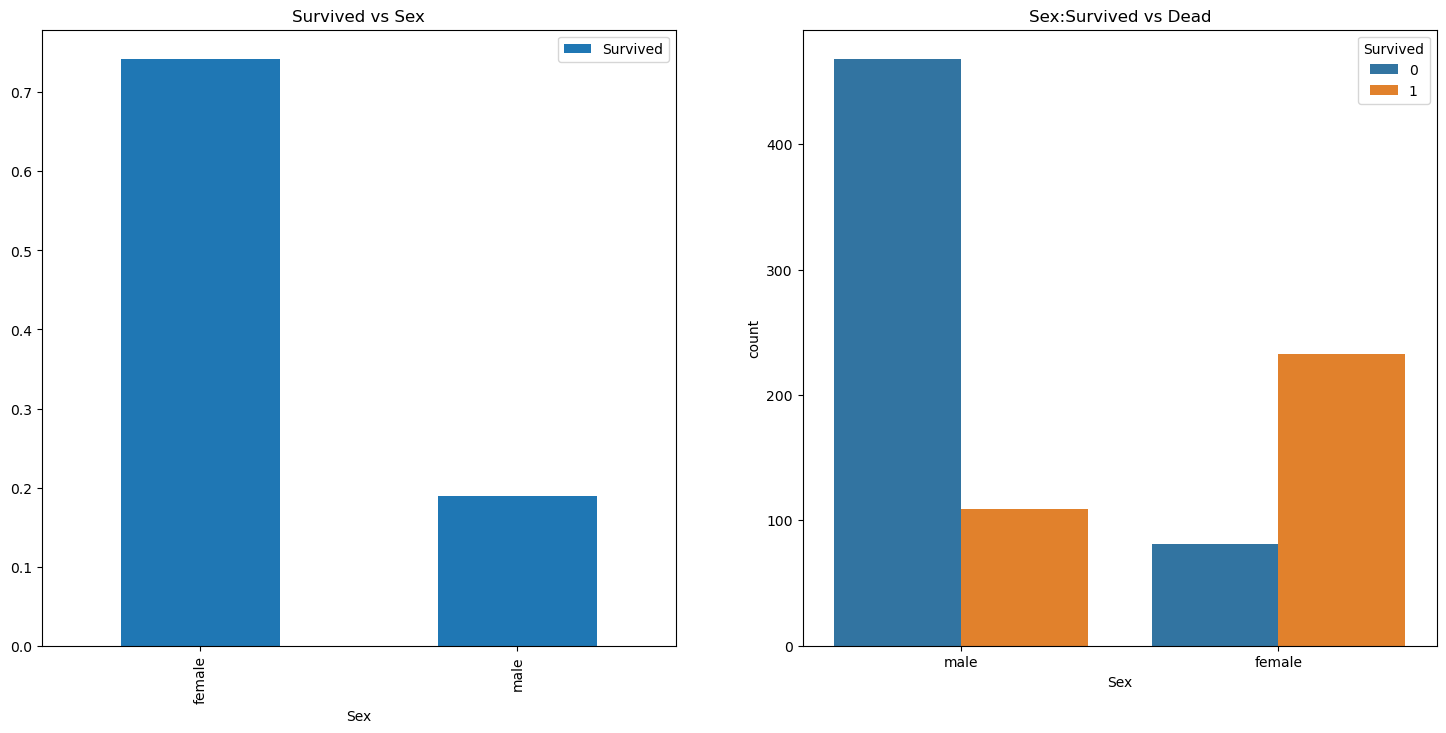

In [446]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

**Pclass별 생존, 사망 수를 확인합니다.**

`pd.crosstab`을 이용하여 `data.Pclass`, `data.Survived`의 교차표를 구합니다.

In [447]:
pd.crosstab(data.Pclass, data.Survived)  # crosstab : count를 2차원 형태로 뽑아준다

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [448]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [449]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')  # count 크기에 따라 색깔을 입히자

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


**Pclass 별 생존, 사망의 카운트를 시각화 합니다.**

In [450]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

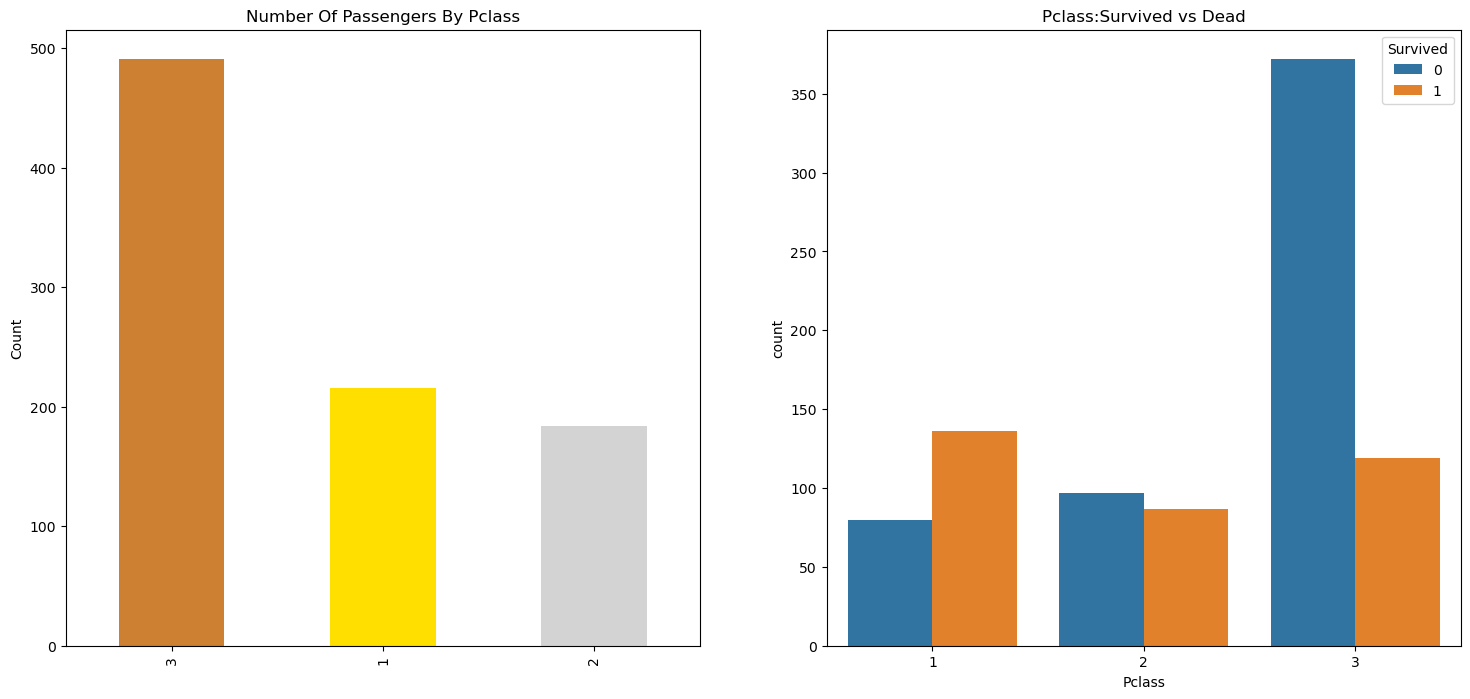

In [453]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])  # 색깔 코드도 넣어주고
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

**Sex, Pclass별 생존, 사망 수를 확인합니다.**

`pd.crosstab`을 이용하여 [`data.Sex`, `data.Survived`], `data.Pclass` 의 교차표를 구합니다.

In [455]:
pd.crosstab([data.Sex, data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

**SibSp별로 생존, 사망 수를 확인합니다.**

`pd.crosstab`을 이용하여 `data.SibSp`, `data.Survived`의 교차표를 구합니다.

In [456]:
pd.crosstab(data.SibSp, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


**Parch별로 생존, 사망 수를 확인합니다.**

`pd.crosstab`을 이용하여 `data.Parch`, `data.Survived`의 교차표를 구합니다.

In [457]:
pd.crosstab(data.Parch, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


**SibSp의 생존률을 라인 그래프로 확인합니다.**

In [458]:
data.groupby("SibSp").Survived.apply(lambda x: print(x))  # 어떻게 생겨먹었는지 뽑아보자

2      1
4      0
5      0
6      0
8      1
      ..
885    0
886    0
887    1
889    1
890    0
Name: 0, Length: 608, dtype: int64
0      0
1      1
3      1
9      1
10     1
      ..
866    1
869    1
871    1
874    1
888    0
Name: 1, Length: 209, dtype: int64
38     0
48     0
69     0
104    0
120    0
147    0
183    1
245    0
301    1
311    1
330    1
333    0
392    0
436    0
437    1
448    1
469    1
529    0
565    0
571    1
600    1
618    1
644    1
655    0
660    1
665    0
742    1
860    0
Name: 2, dtype: int64
7      0
24     0
27     0
63     0
85     1
88     1
176    0
229    0
341    1
374    0
409    0
485    0
634    0
642    0
726    1
819    0
Name: 3, dtype: int64
16     0
50     0
68     1
119    0
164    0
171    0
182    0
233    1
261    1
266    0
278    0
541    0
542    0
686    0
787    0
813    0
824    0
850    0
Name: 4, dtype: int64
59     0
71     0
386    0
480    0
683    0
Name: 5, dtype: int64
159    0
180    0
201    0
324    0
792  

SibSp
0    None
1    None
2    None
3    None
4    None
5    None
8    None
Name: Survived, dtype: object

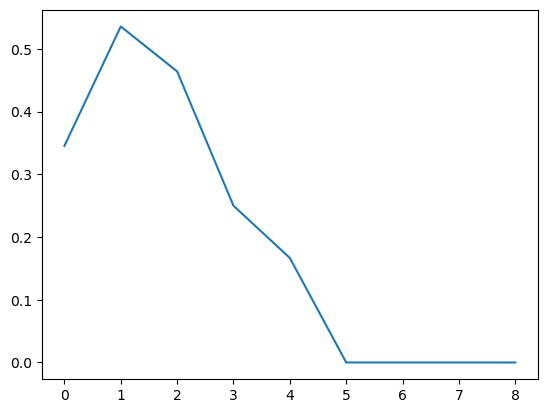

In [459]:
plt.plot(data.groupby("SibSp").Survived.mean())

**Parch의 생존률을 라인 그래프로 확인합니다.**

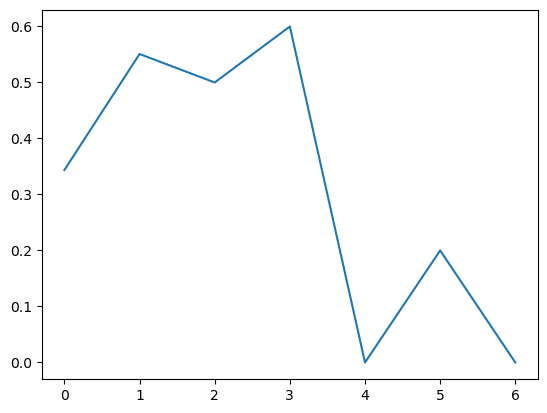

In [460]:
plt.plot(data.groupby("Parch").Survived.mean())

**Embarked의 생존률을 라인그래프로 확인합니다.**

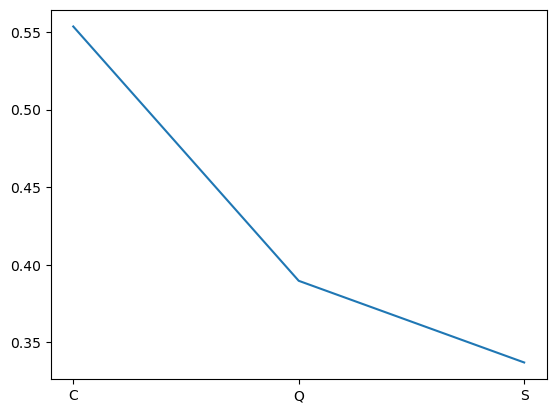

In [461]:
plt.plot(data.groupby("Embarked").Survived.mean())  # 어디서 탑승했는가에 따른 생존률 차이

**Fare_grade의 생존률을 라인그래프로 확인합니다.**

In [463]:
data.Fare  # 탑승요금

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

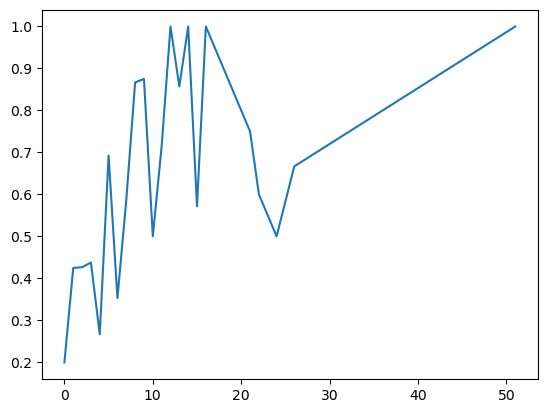

In [462]:
data["Fare_grade"] = (data.Fare / 10).astype(int)  # 10으로 나누고 정수화 → 요금을 구역(grade)별로 나누어 봄 (discrete 하게 등급별로)
plt.plot(data.groupby("Fare_grade").Survived.mean())

**SibSp, Pclass별 생존, 사망 수를 확인합니다.**

In [464]:
pd.crosstab([data.SibSp, data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

**Parch, Pclass별 생존, 사망 수를 확인합니다.**

In [465]:
pd.crosstab([data.Parch, data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

**Embarked, Pclass별 생존, 사망 수를 확인합니다.**

In [466]:
pd.crosstab([data.Embarked, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')